# Edge Detection I
Author: Chul Min Yeum  
Email: cmyeum@uwaterloo.ca  

Last updated: 2023-10-14

## Table of Contents
* Introduction
* Origin of Edges
* Characterizing Edge
* Intensity change and edges
* Image Gradient
* Effects of Noise (2D)
* Effects of noise (1D)
* Derivative of a Guassian Filter
* Sobel Operator
* Laplacian of Gaussian

## Introduction

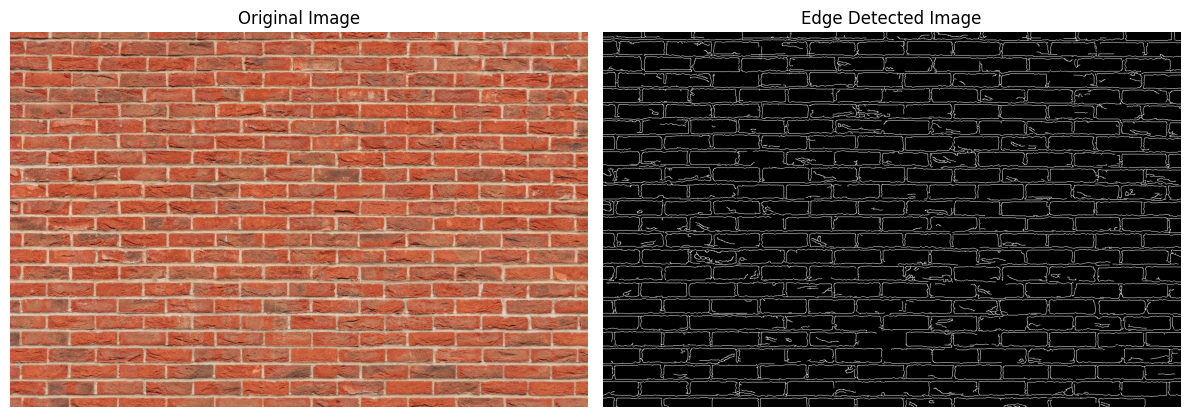

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('brick-wall-bricks-stone-207142.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Resize the image
img = cv2.resize(img, None, fx=0.3, fy=0.3, interpolation=cv2.INTER_CUBIC)

# Convert image to grayscale
imgg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Apply Gaussian filtering and then perform Canny edge detection
imgg_blur = cv2.GaussianBlur(imgg, (5, 5), 3)
img_edge = cv2.Canny(imgg_blur, 50, 150)

# Display the original image and the edge-detected image
plt.figure(1, figsize=(12,6))
plt.subplot(121), plt.imshow(img), plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(img_edge, cmap='gray'), plt.title('Edge Detected Image'), plt.axis('off')
plt.tight_layout()
plt.show()

## Origin of Edges

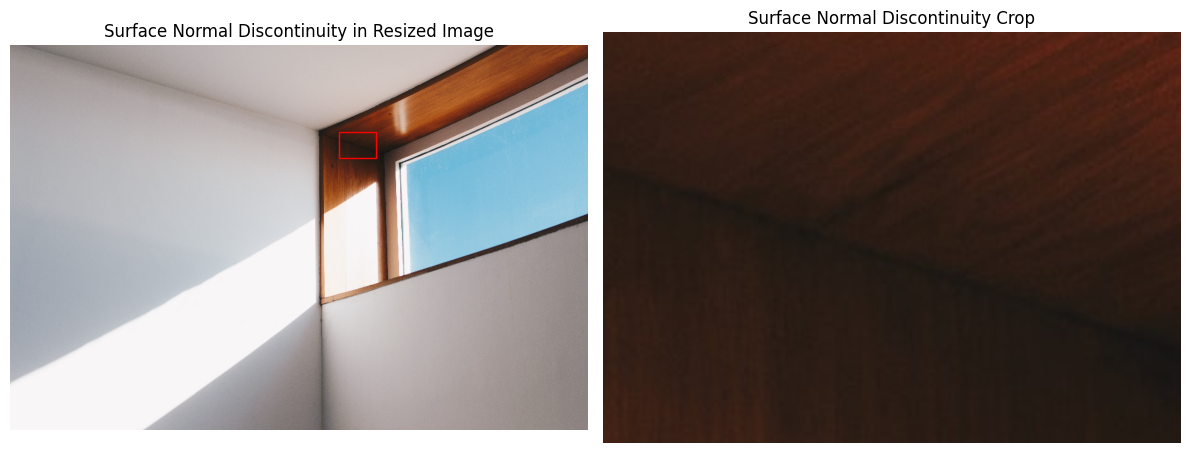

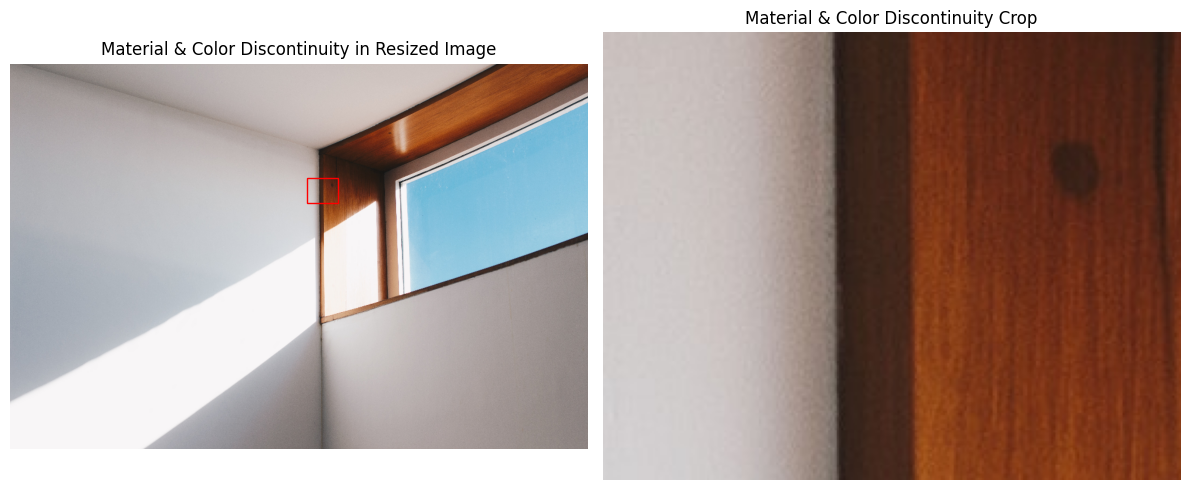

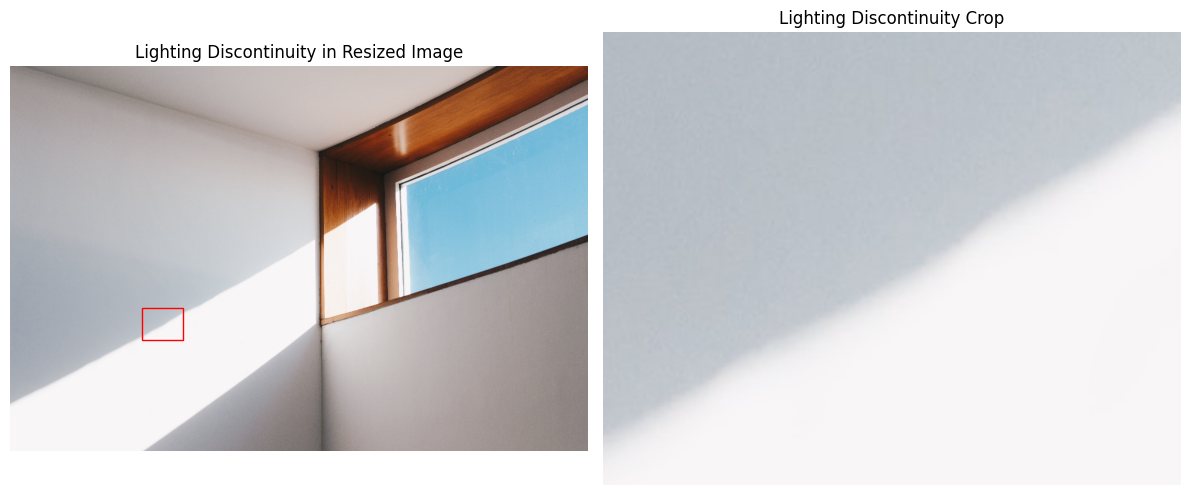

In [8]:
import cv2
import matplotlib.pyplot as plt

# Read the image
img_org = cv2.imread('architecture-blank-space-blue-sky-921294.jpg')
img_org = cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Resize the image
img = cv2.resize(img_org, None, fx=0.2, fy=0.2, interpolation=cv2.INTER_CUBIC)

def show_region_and_crop(img, img_org, pos, title=""):
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    plt.imshow(img), plt.axis('off')
    plt.gca().add_patch(plt.Rectangle((pos[0]*0.2, pos[1]*0.2), pos[2]*0.2, pos[3]*0.2, edgecolor='r', fill=False))
    plt.title(title + ' in Resized Image')

    cropped_img = img_org[int(pos[1]):int(pos[1] + pos[3]), int(pos[0]):int(pos[0] + pos[2])]
    plt.subplot(122)
    plt.imshow(cropped_img), plt.axis('off')
    plt.title(title + ' Crop')
    plt.tight_layout()
    plt.show()

# Surface normal discontinuity
pos1 = [2804.5, 736.51, 311.98, 221.98]
show_region_and_crop(img, img_org, pos1, "Surface Normal Discontinuity")

# Material & color discontinuity
pos2 = [2528.5, 976.51, 266.98, 206.98]
show_region_and_crop(img, img_org, pos2, "Material & Color Discontinuity")

# Lighting discontinuity
pos3 = [1126.5, 2062.5, 347.98, 272.98]
show_region_and_crop(img, img_org, pos3, "Lighting Discontinuity")


## Characterizing Edge

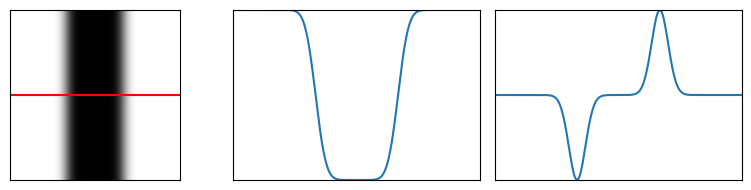

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Create the synthetic image
img = np.tile(np.repeat([1.0, 0, 1.0], 100), (300, 1))
img = cv2.GaussianBlur(img, (0, 0), 10)  # Applying Gaussian filter

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(8, 2))

# Display the image with a red line
axs[0].imshow(img, cmap='gray')
axs[0].plot([0, 300], [150, 150], color='r')
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].autoscale(enable=True, axis='both', tight=True)

# Plot the intensity values along the red line
sig = img[150, :]
axs[1].plot(sig)
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].autoscale(enable=True, axis='both', tight=True)

# Plot the differences of intensity values
axs[2].plot(np.diff(sig))
axs[2].set_xticks([])
axs[2].set_yticks([])
axs[2].autoscale(enable=True, axis='both', tight=True)

plt.tight_layout()
plt.show()

## Intensity change and edges

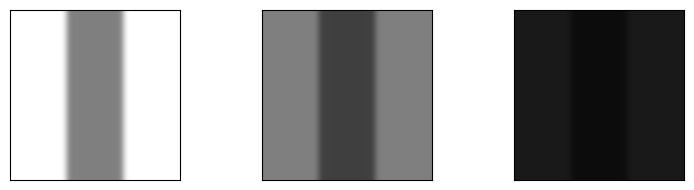

In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Create the synthetic image
img = np.tile(np.repeat([1, 0.5, 1], 100), (300, 1))
img = cv2.GaussianBlur(img, (0, 0), 5)  # Applying Gaussian filter

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(8, 2))

# Display the original image
axs[0].imshow(img, cmap='gray', vmin=0, vmax=1)
axs[0].set_xticks([])
axs[0].set_yticks([])

# Display the image with intensity scaled by 0.5
axs[1].imshow(img * 0.5, cmap='gray', vmin=0, vmax=1)
axs[1].set_xticks([])
axs[1].set_yticks([])

# Display the image with intensity scaled by 0.1
axs[2].imshow(img * 0.1, cmap='gray', vmin=0, vmax=1)
axs[2].set_xticks([])
axs[2].set_yticks([])

plt.tight_layout()
plt.show()

## Image Gradient

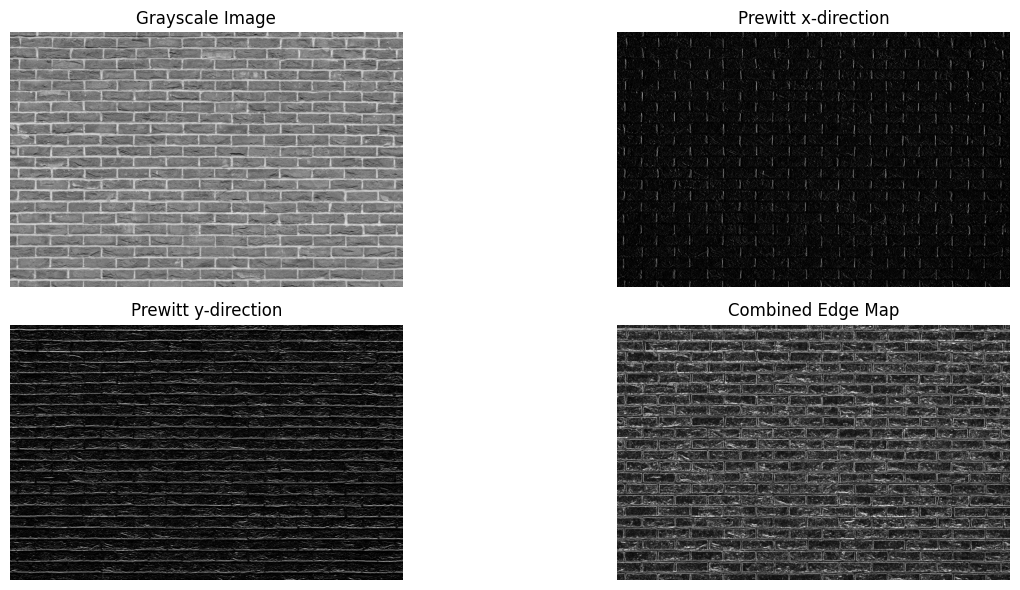

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load, resize, and convert the image to grayscale
img = cv2.imread('brick-wall-bricks-stone-207142.jpg')
img = cv2.resize(img, (0,0), fx=0.4, fy=0.4)
imgg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgg = imgg.astype(np.float32) / 255.0  # Convert to float in range [0, 1]

# Define the Prewitt operators
prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_y = np.transpose(prewitt_x)

# Apply the filters
fx = cv2.filter2D(imgg, -1, prewitt_x)
fy = cv2.filter2D(imgg, -1, prewitt_y)
fxy = np.sqrt(fx**2 + fy**2)

# Display the results
fig, axs = plt.subplots(2, 2, figsize=(14, 6))
axs[0, 0].imshow(imgg, cmap='gray')
axs[0, 0].set_title('Grayscale Image')
axs[0, 1].imshow(np.clip(fx,0,1), cmap='gray')
axs[0, 1].set_title('Prewitt x-direction')
axs[1, 0].imshow(np.clip(fy,0,1), cmap='gray')
axs[1, 0].set_title('Prewitt y-direction')
axs[1, 1].imshow(np.clip(fxy,0,1), cmap='gray')
axs[1, 1].set_title('Combined Edge Map')

for ax in axs.ravel():
    ax.axis('off')

plt.tight_layout()
plt.show()


## Effects of Noise (2D)

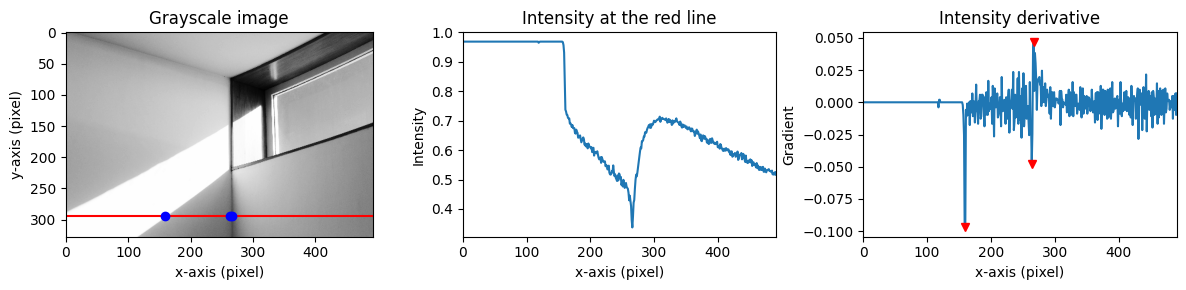

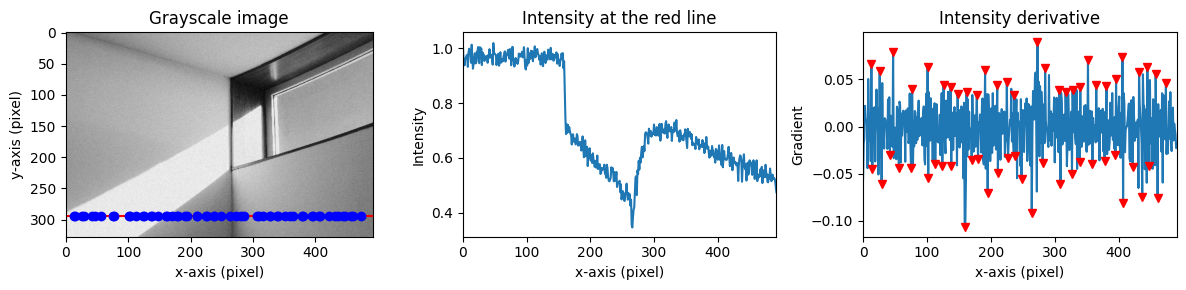

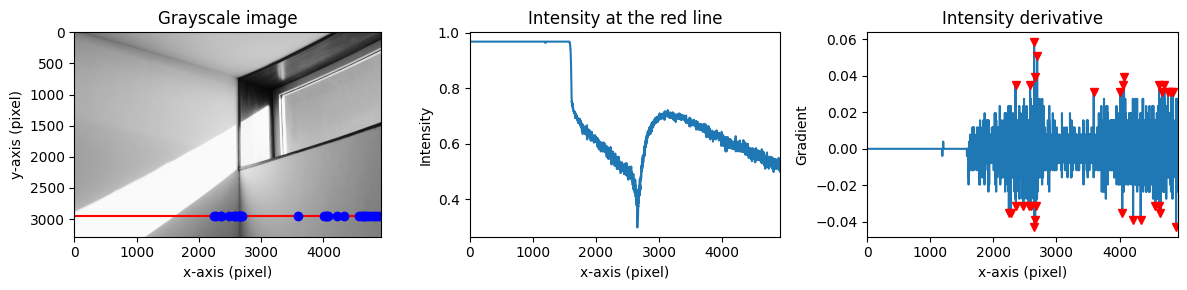

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Read, convert to grayscale and double precision, and resize the image
img_org = cv2.imread('architecture-blank-space-blue-sky-921294.jpg')
img_org = cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB)  # convert BGR to RGB
imgg = cv2.cvtColor(img_org, cv2.COLOR_RGB2GRAY)
imgg = imgg.astype(np.float32) / 255.0  # Convert to float in range [0, 1]
img = cv2.resize(imgg, (0,0), fx=0.1, fy=0.1)

def plot_procedure(img, ax_pos):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3))
    
    ax1.imshow(img, cmap='gray')
    ax1.axhline(ax_pos, color='r')
    ax1.set_title('Grayscale image')
    ax1.set_xlabel('x-axis (pixel)')
    ax1.set_ylabel('y-axis (pixel)')

    sig = img[ax_pos, :]
    ax2.plot(sig)
    ax2.set_title('Intensity at the red line')
    ax2.set_xlabel('x-axis (pixel)')
    ax2.set_ylabel('Intensity')
    ax2.axis('tight')
    ax2.autoscale(enable=True, axis='x', tight=True)

    diff_sig = np.diff(sig)
    ax3.plot(diff_sig)
    ax3.set_title('Intensity derivative')
    ax3.set_xlabel('x-axis (pixel)')
    ax3.set_ylabel('Gradient')
    ax3.axis('tight')
    ax3.autoscale(enable=True, axis='x', tight=True)

    pks_1, _ = find_peaks(diff_sig, height=0.03, distance=10)
    pks_2, _ = find_peaks(-diff_sig, height=0.03, distance=10)
    ax1.plot(np.append(pks_1, pks_2), [ax_pos]*len(np.append(pks_1, pks_2)), 'ob')
    ax3.plot(pks_1, diff_sig[pks_1], 'rv', markerfacecolor='r')
    ax3.plot(pks_2, diff_sig[pks_2], 'rv', markerfacecolor='r')

    plt.tight_layout()
    plt.show()

plot_procedure(img, 295)

# Adding Gaussian noise to the image
img_noisy = cv2.add(img, cv2.randn(np.zeros_like(img), 0, 0.02))
plot_procedure(img_noisy, 295)

# Original resolution image
plot_procedure(imgg, 2950)

## Effects of noise (1D)

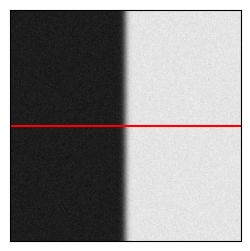

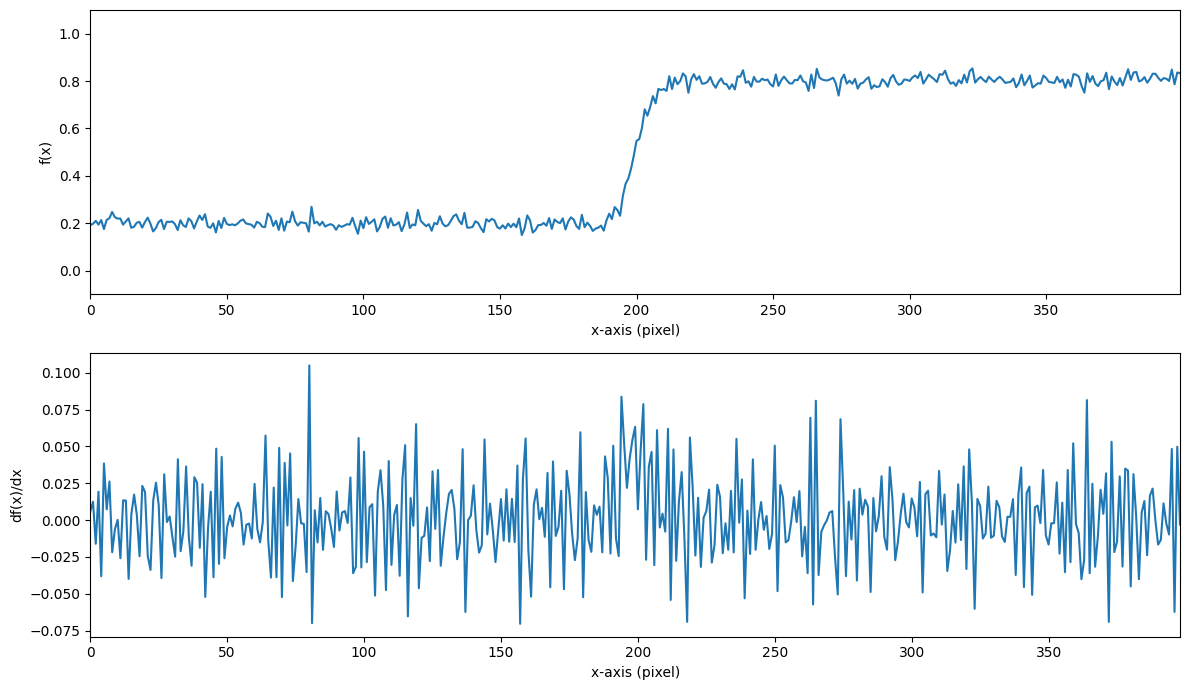

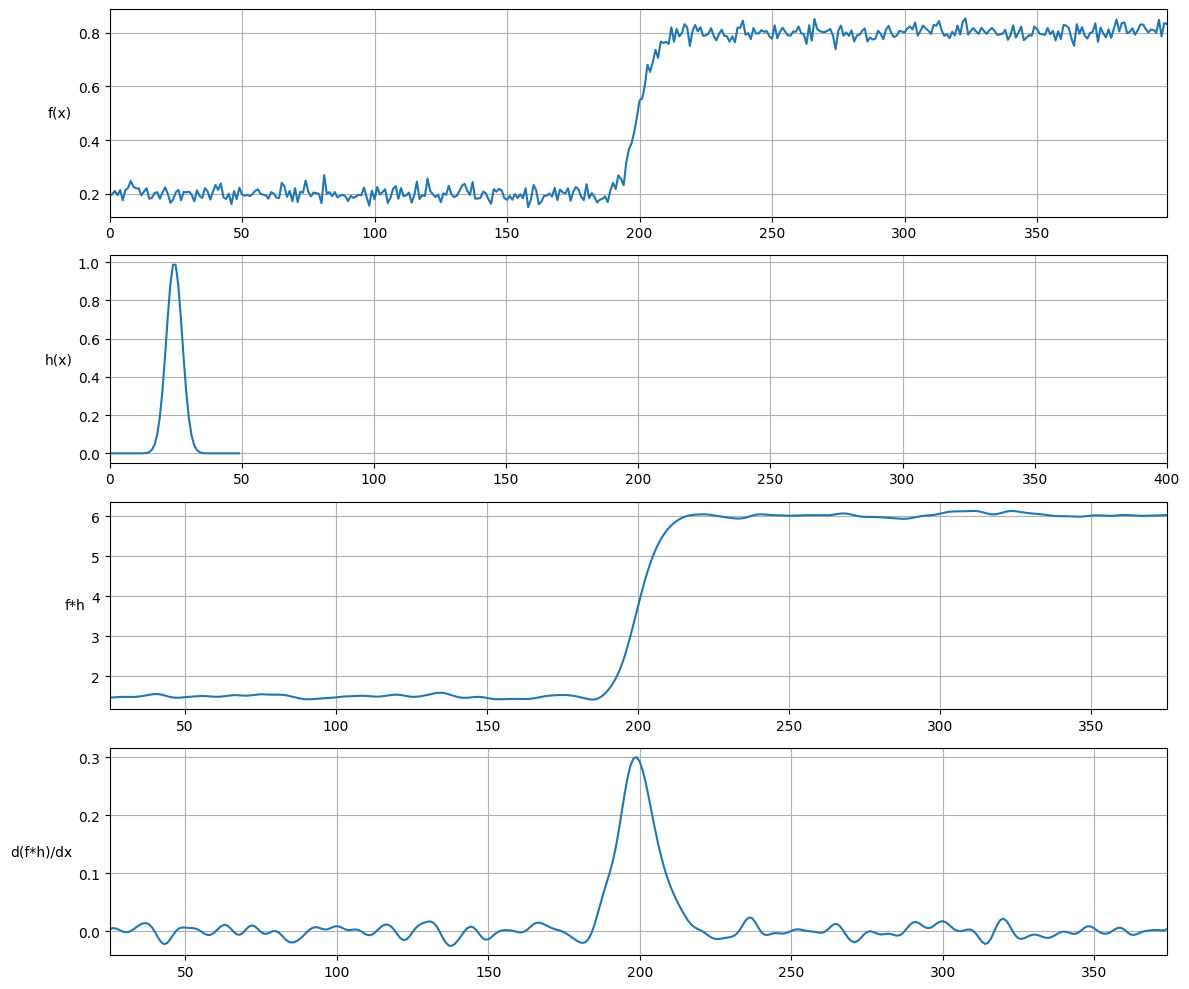

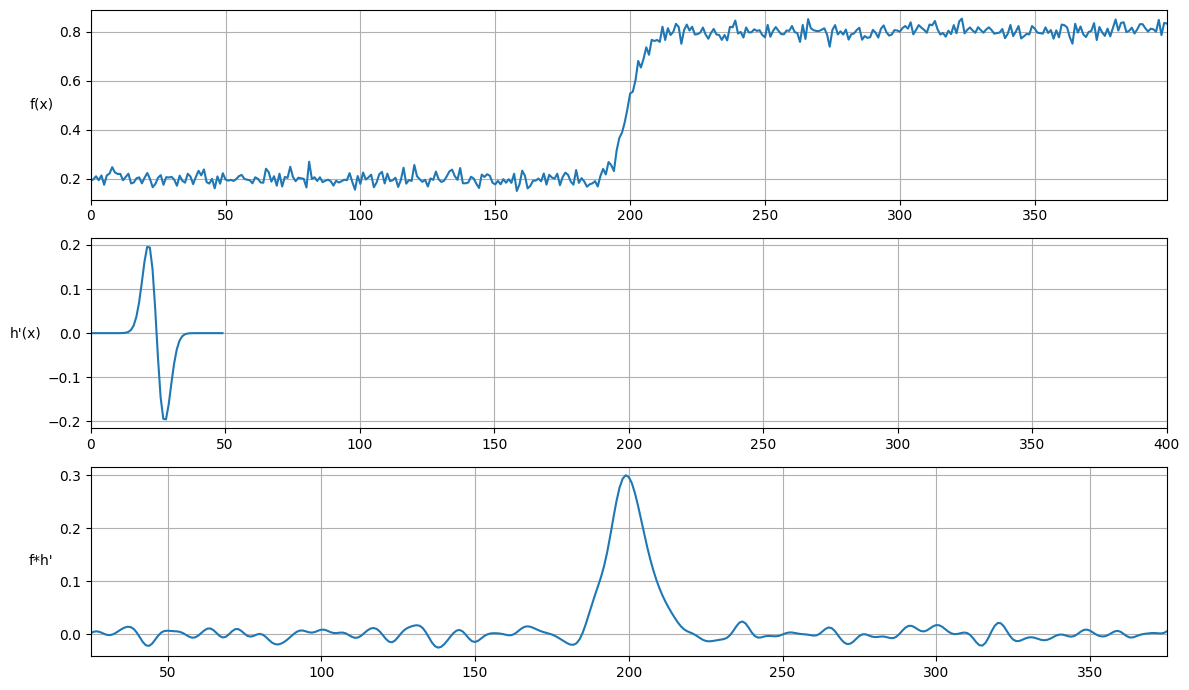

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

def gausswin(N, alpha=2.5):
    """
    Returns a Gaussian window of length N with standard deviation alpha.
    """
    n = np.arange(0, N) - (N - 1.0) / 2.0
    w = np.exp(-(n**2) / (2*alpha**2))
    return w

# Create artificial image
img = np.tile(np.repeat([0.2, 0.8], 200), (400, 1))
img = cv2.GaussianBlur(img, (0, 0), 5)
img += np.random.normal(0, 0.02, img.shape)

# Display noisy image
fig1, ax = plt.subplots()
ax.imshow(img, cmap='gray')
ax.axhline(200, color='red')
ax.set_xticks([])
ax.set_yticks([])
fig1.set_size_inches(3, 3)

sig = img[150, :]
fig2, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 7))
ax1.plot(sig)
ax1.set_ylim([-0.1, 1.1])
ax1.set_xlabel('x-axis (pixel)')
ax1.set_ylabel('f(x)')
ax1.autoscale(enable=True, axis='x', tight=True)

diff_sig = np.diff(sig)
ax2.plot(diff_sig)
ax2.set_xlabel('x-axis (pixel)')
ax2.set_ylabel('df(x)/dx')
ax2.autoscale(enable=True, axis='x', tight=True)

plt.tight_layout()
plt.show()

# Convolve with Gaussian window
windSize = 50
h = gausswin(windSize, 3)
fh = convolve(sig, h, mode='valid')
diff_fh = np.diff(fh)

fig3, axes = plt.subplots(4, 1, figsize=(12, 10))
axes[0].plot(sig)
axes[0].set_ylabel('f(x)', rotation=0, va='center', ha='right')
axes[0].grid(True)
axes[0].autoscale(enable=True, axis='x', tight=True)

axes[1].plot(h)
axes[1].set_ylabel('h(x)', rotation=0, va='center', ha='right')
axes[1].grid(True)
axes[1].autoscale(enable=True, axis='x', tight=True)
axes[1].set_xlim(0, len(sig)) 

axes[2].plot(np.arange(windSize//2, len(fh)+windSize//2), fh)
axes[2].set_ylabel('f*h', rotation=0, va='center', ha='right')
axes[2].grid(True)
axes[2].autoscale(enable=True, axis='x', tight=True)

axes[3].plot(np.arange(windSize//2, len(diff_fh)+windSize//2), diff_fh)
axes[3].set_ylabel('d(f*h)/dx', rotation=0, va='center', ha='right')
axes[3].grid(True)
axes[3].autoscale(enable=True, axis='x', tight=True)

plt.tight_layout()
plt.show()

# Convolve with derivative of Gaussian window
windSize = 51
h = gausswin(windSize, 3)
diff_h = np.diff(h)
fh = convolve(sig, diff_h, mode='valid')

fig4, axes = plt.subplots(3, 1, figsize=(12, 7))
axes[0].plot(sig)
axes[0].set_ylabel('f(x)', rotation=0, va='center', ha='right')
axes[0].grid(True)
axes[0].autoscale(enable=True, axis='x', tight=True)

axes[1].plot(diff_h)
axes[1].set_ylabel("h'(x)", rotation=0, va='center', ha='right')
axes[1].grid(True)
axes[1].set_xlim(0, len(sig)) 

axes[2].plot(np.arange(windSize//2, len(fh)+windSize//2), fh)
axes[2].set_ylabel('f*h\'', rotation=0, va='center', ha='right')
axes[2].grid(True)
axes[2].autoscale(enable=True, axis='x', tight=True)

plt.tight_layout()
plt.show()


## Derivative of a Guassian Filter

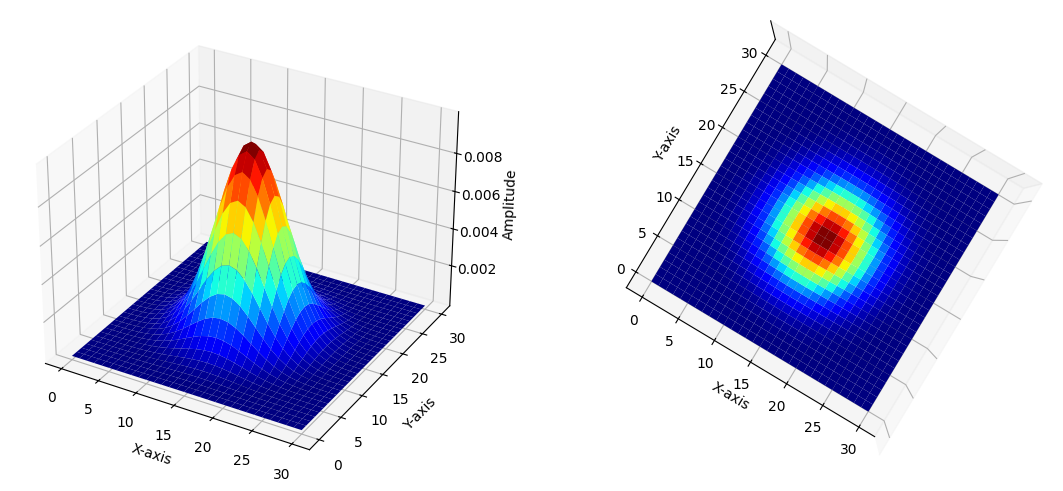

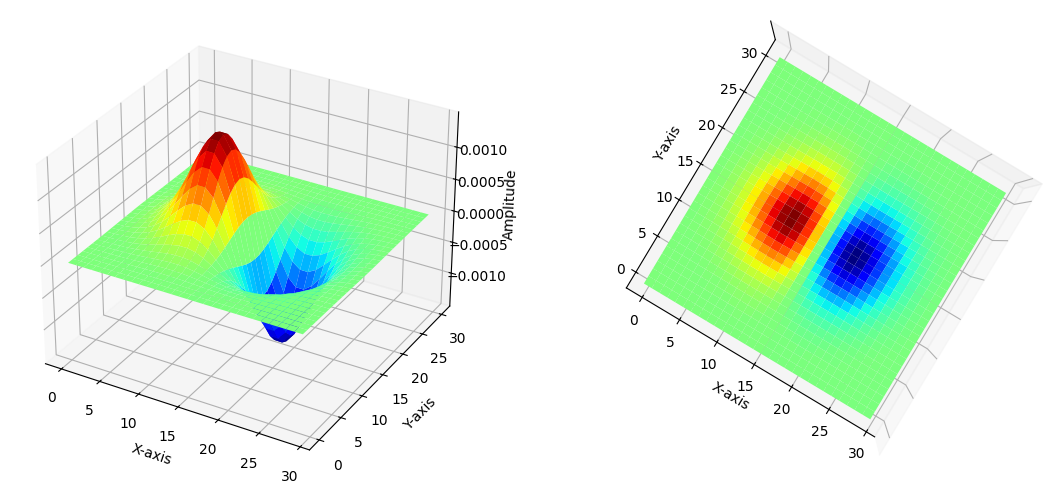

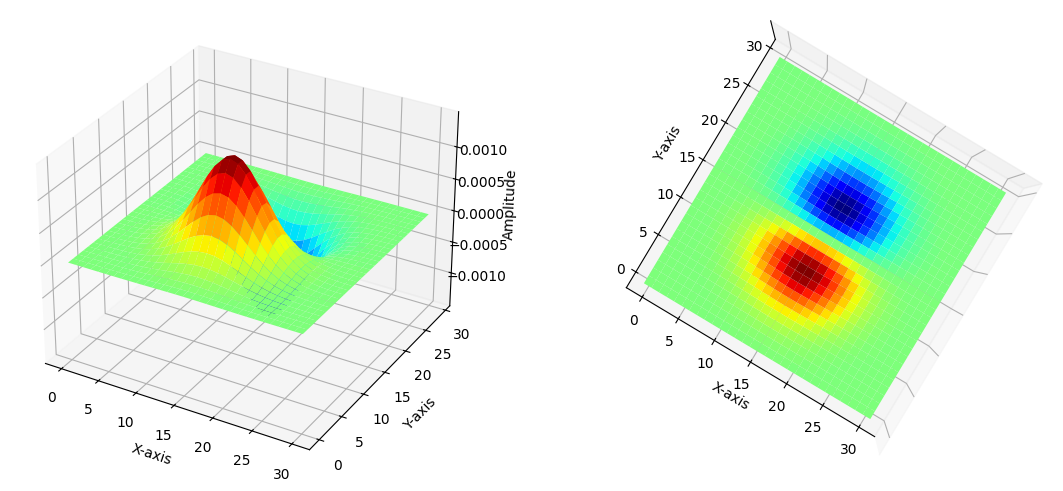

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal.windows import gaussian
from mpl_toolkits.mplot3d import Axes3D

numSize = 3

# Generate the meshgrid
x, y = np.meshgrid(np.arange(1, numSize + 1), np.arange(1, numSize + 1))
x = x - np.round(numSize / 2)
y = y - np.round(numSize / 2)

sigma = 1

# Generate the Gaussian filter
G_sigma = 1 / (2 * np.pi * sigma**2) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
G_sigma = G_sigma / np.sum(G_sigma)

# Generate the Gaussian filter using scipy's gaussian function
h_size = 31
h_sigma = 4
h = gaussian(h_size, h_sigma)
h = np.outer(h, h)
h = h / np.sum(h)

# Plot the Gaussian filter
fig2 = plt.figure(figsize=(12,5))
ax1 = fig2.add_subplot(121, projection='3d')
X, Y = np.meshgrid(np.arange(h.shape[0]), np.arange(h.shape[1]), indexing='ij')
ax1.plot_surface(X, Y, h, cmap='jet')
ax1.set(xlabel='X-axis', ylabel='Y-axis', zlabel='Amplitude')
ax1.autoscale(enable=True, axis='both', tight=True)

ax2 = fig2.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, h, cmap='jet')
ax2.view_init(elev=90)  # Sets the viewing angle to top-down
ax2.set(xlabel='X-axis', ylabel='Y-axis')
ax2.autoscale(enable=True, axis='both', tight=True)
ax2.set_zticks([])

fig2.tight_layout()
plt.show()

# Calculate and plot the derivative in x direction
diff_h_x = np.diff(h, axis=0)
fig3 = plt.figure(figsize=(12,5))
ax1 = fig3.add_subplot(121, projection='3d')
X_diff_x, Y_diff_x = np.meshgrid(np.arange(diff_h_x.shape[0]), np.arange(diff_h_x.shape[1]), indexing='ij')
ax1.plot_surface(X_diff_x, Y_diff_x, diff_h_x, cmap='jet')
ax1.set(xlabel='X-axis', ylabel='Y-axis', zlabel='Amplitude')

ax2 = fig3.add_subplot(122, projection='3d')
ax2.plot_surface(X_diff_x, Y_diff_x, diff_h_x, cmap='jet')
ax2.view_init(elev=90)
ax2.set(xlabel='X-axis', ylabel='Y-axis')
ax2.set_zticks([])

fig3.tight_layout()
plt.show()

# Calculate and plot the derivative in y direction
diff_h_y = np.diff(h, axis=1)
fig4 = plt.figure(figsize=(12,5))
ax1 = fig4.add_subplot(121, projection='3d')
X_diff_y, Y_diff_y = np.meshgrid(np.arange(diff_h_y.shape[0]), np.arange(diff_h_y.shape[1]), indexing='ij')
ax1.plot_surface(X_diff_y, Y_diff_y, diff_h_y, cmap='jet')
ax1.set(xlabel='X-axis', ylabel='Y-axis', zlabel='Amplitude')

ax2 = fig4.add_subplot(122, projection='3d')
ax2.plot_surface(X_diff_y, Y_diff_y, diff_h_y, cmap='jet')
ax2.view_init(elev=90)
ax2.set(xlabel='X-axis', ylabel='Y-axis')
ax2.set_zticks([])

fig4.tight_layout()
plt.show()



## Sobel Operator


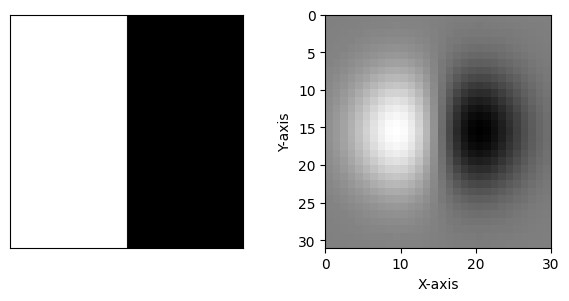

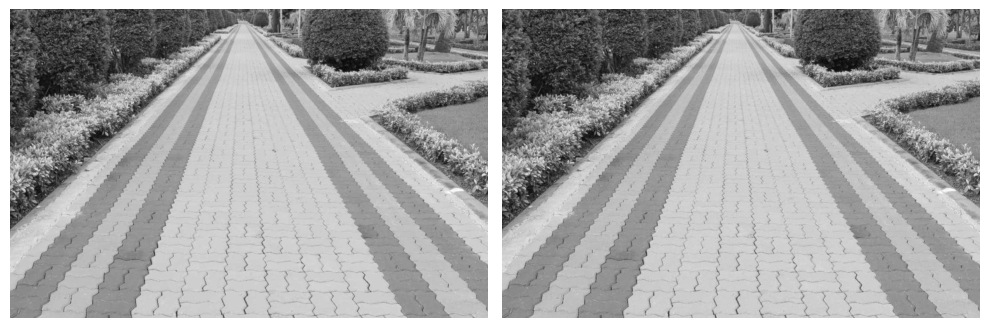

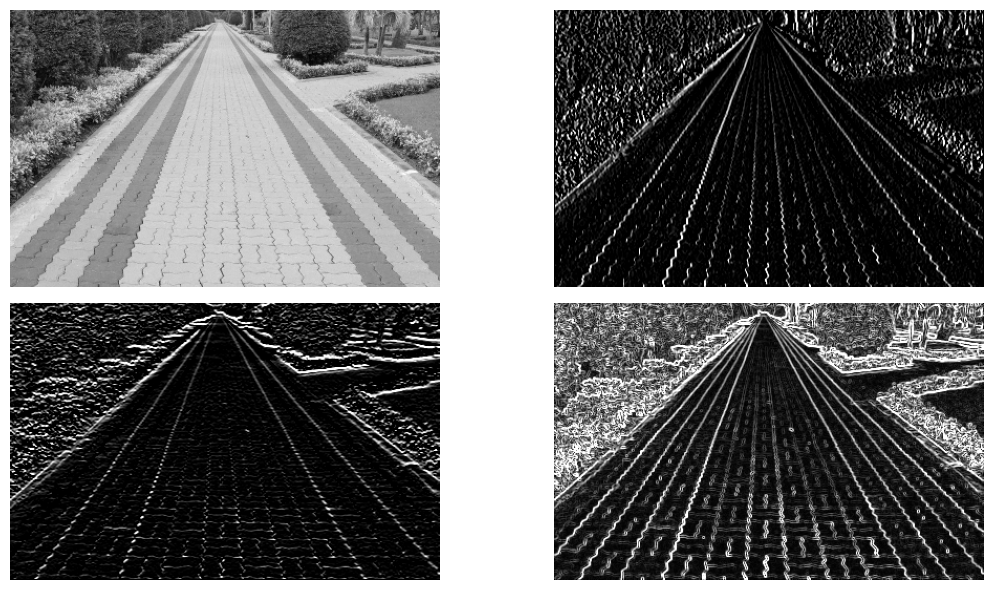

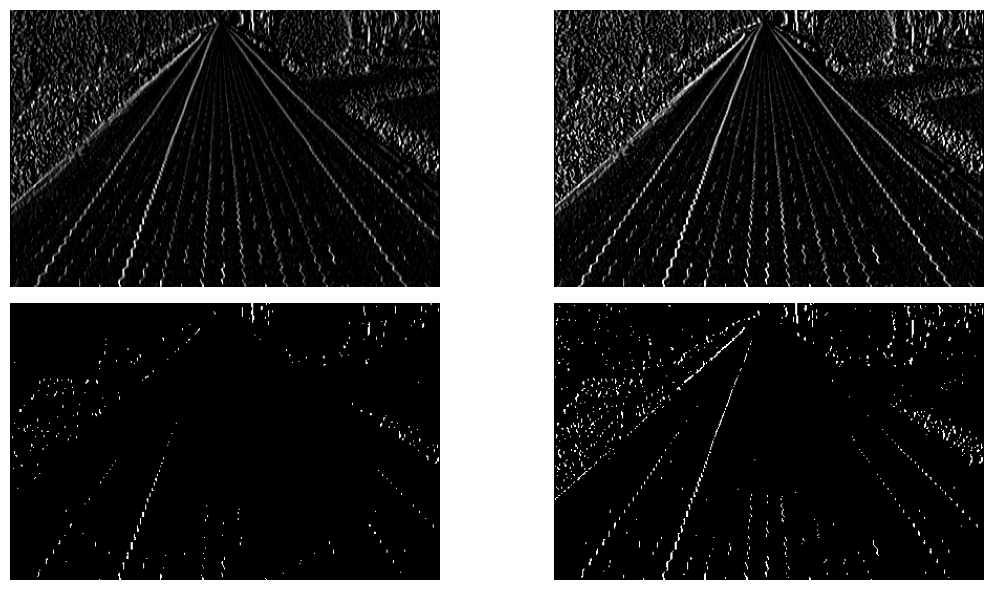

In [70]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Define the first image pattern
img = np.tile(np.repeat([0.8, 0.2], 200), (400, 1))

# Display the pattern and the derivative of Gaussian filter
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))
ax1.imshow(img, cmap='gray')
ax1.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
ax1.set_xticks([])
ax1.set_yticks([])

h_size = 31
h_sigma = 5.5
h = cv2.getGaussianKernel(h_size, h_sigma)
h = h @ h.T
diff_h_x = np.diff(h, axis=1)
ax2.imshow(diff_h_x, cmap='gray', origin='upper', extent=[0, diff_h_x.shape[1], diff_h_x.shape[0], 0])
ax2.set(xlabel='X-axis', ylabel='Y-axis')
fig1.tight_layout()

# Load, resize, and add noise to the image
imgo = cv2.imread('block_road.jpg', cv2.IMREAD_GRAYSCALE)
noise = np.random.normal(0, 0.01*255, imgo.shape).astype(np.float32)
img = cv2.addWeighted(imgo.astype(np.float32), 1, noise, 1, 0).clip(0, 255).astype(np.uint8)
imgg = cv2.resize(img, None, fx=0.4, fy=0.4).astype(np.float32) / 255.0

# Display the original and noisy images
plt.figure(4, figsize=(10,5))
plt.subplot(121)
plt.imshow(imgo, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()

# Define Sobel and Prewitt operators
prewitt_x = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]).T
prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

sobel_x = prewitt_x.copy()
sobel_x[1, 0] = -2
sobel_x[1, 2] = 2

sobel_y = prewitt_y.copy()
sobel_y[0, 1] = -2
sobel_y[2, 1] = 2

# Apply Sobel operators
fx = cv2.filter2D(imgg, -1, sobel_x)
fy = cv2.filter2D(imgg, -1, sobel_y)
fxy = np.sqrt(fx**2 + fy**2)

# Display results
fig2, axes = plt.subplots(2, 2, figsize=(12, 6))
axes[0, 0].imshow(imgg, cmap='gray')
axes[0, 1].imshow(fx.clip(0, 1), cmap='gray')
axes[1, 0].imshow(fy.clip(0, 1), cmap='gray')
axes[1, 1].imshow(fxy.clip(0, 1), cmap='gray')
for ax in axes.ravel():
    ax.axis('off')
fig2.tight_layout()
plt.show()

# Apply Sobel and Prewitt, then threshold
fx = cv2.filter2D(imgg, -1, prewitt_x)
sx = cv2.filter2D(imgg, -1, sobel_x)

# Display results
fig3, axes = plt.subplots(2, 2, figsize=(12, 6))
axes[0, 0].imshow(fx.clip(0, 1), cmap='gray')
axes[0, 1].imshow(sx.clip(0, 1), cmap='gray')
axes[1, 0].imshow(fx > 0.7, cmap='gray')
axes[1, 1].imshow(sx > 0.7, cmap='gray')
for ax in axes.ravel():
    ax.axis('off')
fig3.tight_layout()

plt.show()


## Laplacian of Gaussian

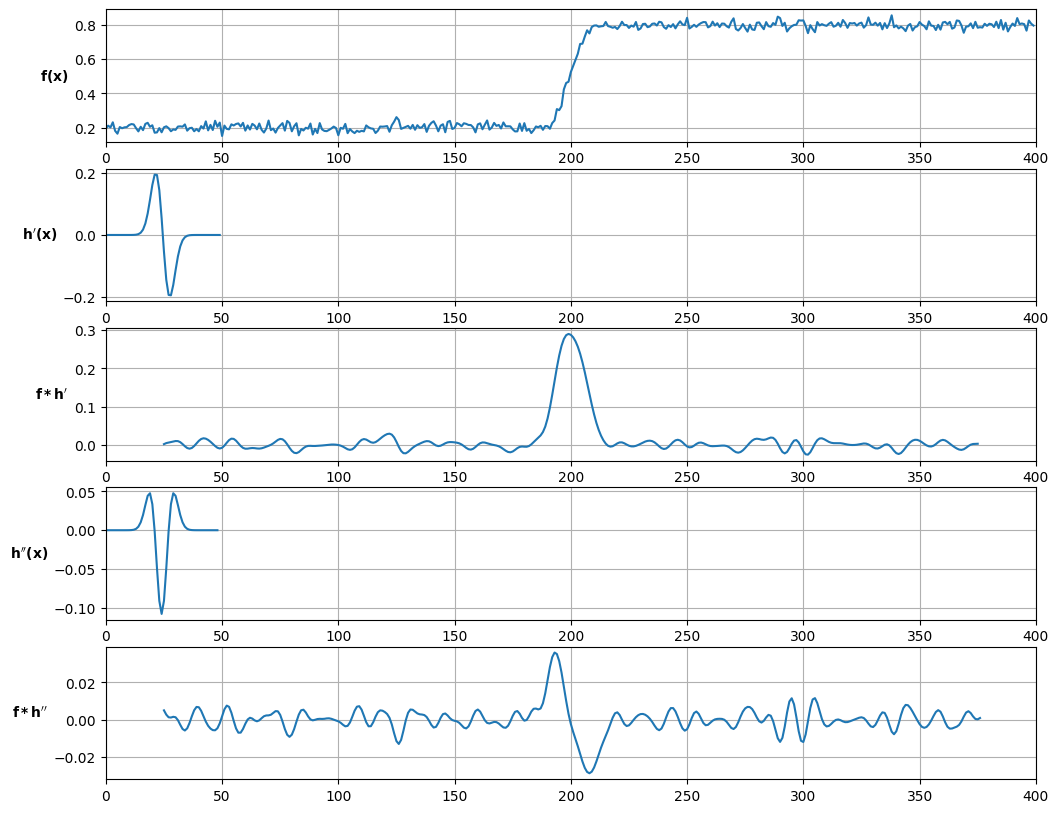

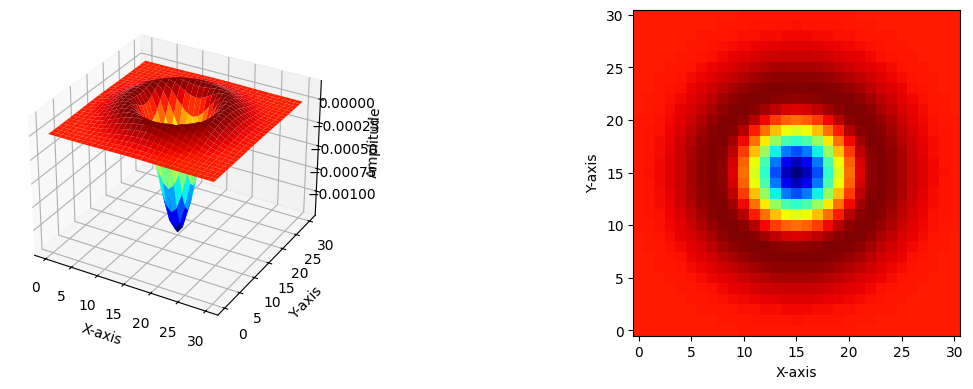

In [105]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D  # Import the necessary module for 3D plotting
from scipy.signal import convolve

def gausswin(N, alpha=2.5):
    """
    Returns a Gaussian window of length N with standard deviation alpha.
    """
    n = np.arange(0, N) - (N - 1.0) / 2.0
    w = np.exp(-(n**2) / (2*alpha**2))
    return w

def log_filter(size, sigma):
    """Generate a Laplacian of Gaussian filter."""
    radius = size // 2
    y, x = np.ogrid[-radius:radius+1, -radius:radius+1]
    
    # Calculate the LoG function
    log = -(1 / (np.pi * sigma**4)) * (1 - (x**2 + y**2) / (2 * sigma**2)) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
    
    return log

# Create artificial image
img = np.tile(np.repeat([0.2, 0.8], 200), (400, 1))
img = cv2.GaussianBlur(img, (0, 0), 5)
img += np.random.normal(0, 0.02, img.shape)
sig = img[150, :]

# Plot the signal
fig1, axs = plt.subplots(5, 1, figsize=(12, 10))
axs[0].plot(sig, linewidth=1.5)
axs[0].set_ylabel(r'$\mathbf{f(x)}$', rotation=0, va='center', ha='right')
axs[0].grid(True)
axs[0].autoscale(enable=True, axis='x', tight=True)

# Create Gaussian window and its derivative
windSize = 51
h = gausswin(windSize, 3)
diff_h = np.diff(h)

axs[1].plot(diff_h, linewidth=1.5)
axs[1].set_ylabel(r'$\mathbf{h^{\prime}(x)}$', rotation=0, va='center', ha='right')
axs[1].grid(True)

fh = convolve(sig, diff_h, mode='valid')
axs[2].plot(np.arange(windSize//2, windSize//2+len(fh)), fh, linewidth=1.5)
axs[2].set_ylabel(r'$\mathbf{f * h\'}$', rotation=0, va='center', ha='right')
axs[2].set_ylabel(r'$\mathbf{f * h^{\prime}}$', rotation=0, va='center', ha='right')
axs[2].grid(True)

diff_h2 = np.diff(diff_h)
axs[3].plot(diff_h2, linewidth=1.5)
axs[3].set_ylabel(r'$\mathbf{h^{\prime\prime}(x)}$', rotation=0, va='center', ha='right')
axs[3].grid(True)

fh2 = convolve(sig, diff_h2, mode='valid')
axs[4].plot(np.arange(windSize//2, windSize//2+len(fh2)), fh2, linewidth=1.5)
axs[4].set_ylabel(r'$\mathbf{f * h^{\prime\prime}}$', rotation=0, va='center', ha='right')
axs[4].grid(True)

for ax in axs:
    ax.set_xlim(0, len(sig))

fig2 = plt.figure(figsize=(14, 4))

# Creating 3D axes using Axes3D
ax1 = fig2.add_subplot(1, 2, 1, projection='3d')

# Create a 2-D Laplacian of Gaussian filter
h = log_filter(31, 4)

X, Y = np.meshgrid(np.arange(31), np.arange(31))  # Create a meshgrid for X and Y
ax1.plot_surface(X, Y, h, cmap='jet', edgecolor='none')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.set_zlabel('Amplitude')

ax2 = fig2.add_subplot(1, 2, 2)
ax2.imshow(h, cmap='jet', aspect='auto', origin='lower')
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')
ax2.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()
